In [1]:
!pip install networkx
!pip install matplotlib


In [18]:
def kruskal(graph):
    # Step 1: Collect all edges and sort by weight
    edges = []
    for u in graph:
        for v, w in graph[u]:
            if (v, u, w) not in edges:  # avoid duplicate edges
                edges.append((u, v, w))

    edges.sort(key=lambda x: x[2])  # sort by weight

    # Disjoint Set (Union-Find)
    parent = {}
    rank = {}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])  # path compression
        return parent[node]

    def union(u, v):
        root_u = find(u)
        root_v = find(v)
        if root_u != root_v:
            if rank[root_u] < rank[root_v]:
                parent[root_u] = root_v
            elif rank[root_u] > rank[root_v]:
                parent[root_v] = root_u
            else:
                parent[root_v] = root_u
                rank[root_u] += 1

    # Initialize disjoint sets
    for node in graph.keys():
        parent[node] = node
        rank[node] = 0

    # Step 2: Kruskal's algorithm
    mst = []
    total_weight = 0

    print("Initial sorted edges:", edges)
    print("-------------------------------")

    for i, (u, v, w) in enumerate(edges):
        print(f"Step {i + 1}: Checking edge ({u}, {v}, {w})")
        
        if find(u) != find(v):
            print(f" -> Adding edge ({u}, {v}, {w}) to MST")
            union(u, v)
            mst.append((u, v, w))
            total_weight += w
        else:
            print(f" -> Skipping edge ({u}, {v}, {w}) (would form a cycle)")

        print(f"F: {mst}")
        remaining_edges = edges[i + 1:]
        print(f"E*: {remaining_edges}")
        print("-------------------------------")

    print("Final MST:", mst)
    print("Total weight:", total_weight)
    return mst, total_weight


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_mst(graph, mst):
    G = nx.Graph()

    # Add all nodes and edges
    for u in graph:
        for v, w in graph[u]:
            G.add_edge(u, v, weight=w)

    # Create positions for nodes
    pos = nx.spring_layout(G, seed=42)

    # Draw full graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=12)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Highlight MST edges
    mst_edges = [(u, v) for u, v, _ in mst]
    nx.draw_networkx_edges(G, pos, edgelist=mst_edges, width=3, edge_color='red')

    plt.title("Minimum Spanning Tree (Kruskal)")
    plt.show()

Initial sorted edges: [('N', 'K', 1), ('M', 'K', 2), ('N', 'M', 3), ('H', 'K', 5), ('H', 'M', 6), ('N', 'H', 8), ('L', 'K', 10), ('H', 'L', 12), ('M', 'L', 15), ('N', 'L', 20)]
-------------------------------
Step 1: Checking edge (N, K, 1)
 -> Adding edge (N, K, 1) to MST
F: [('N', 'K', 1)]
E*: [('M', 'K', 2), ('N', 'M', 3), ('H', 'K', 5), ('H', 'M', 6), ('N', 'H', 8), ('L', 'K', 10), ('H', 'L', 12), ('M', 'L', 15), ('N', 'L', 20)]
-------------------------------
Step 2: Checking edge (M, K, 2)
 -> Adding edge (M, K, 2) to MST
F: [('N', 'K', 1), ('M', 'K', 2)]
E*: [('N', 'M', 3), ('H', 'K', 5), ('H', 'M', 6), ('N', 'H', 8), ('L', 'K', 10), ('H', 'L', 12), ('M', 'L', 15), ('N', 'L', 20)]
-------------------------------
Step 3: Checking edge (N, M, 3)
 -> Skipping edge (N, M, 3) (would form a cycle)
F: [('N', 'K', 1), ('M', 'K', 2)]
E*: [('H', 'K', 5), ('H', 'M', 6), ('N', 'H', 8), ('L', 'K', 10), ('H', 'L', 12), ('M', 'L', 15), ('N', 'L', 20)]
-------------------------------
Step 4: Ch

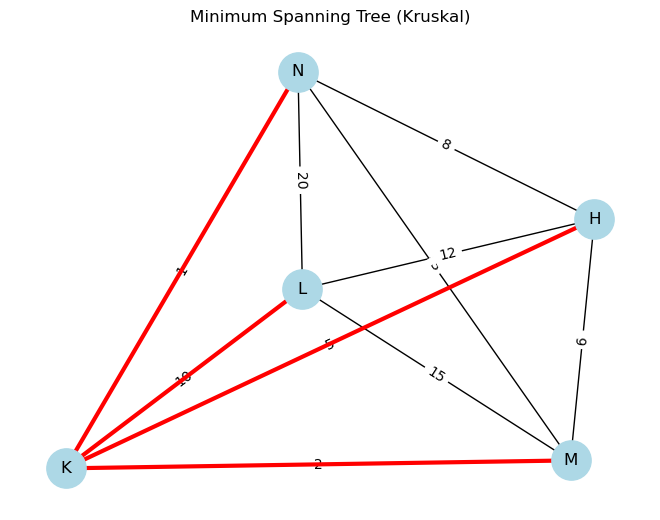

In [20]:
graph = {
    'N': [('M', 3), ('L', 20), ('K', 1), ('H', 8)],
    'H': [('K', 5), ('L', 12), ('N', 8), ('M', 6)],
    'M': [('H', 6), ('K', 2), ('N', 3), ('L', 15)],
    'L': [('H', 12), ('K', 10), ('N', 20), ('M', 15)],
    'K': [('H', 5), ('M', 2), ('N', 1), ('L', 10)],
}

mst, total_weight = kruskal(graph)
print("Minimum Spanning Tree:", mst)
print("Total Weight:", total_weight)

visualize_mst(graph, mst)

Initial sorted edges: [('B', 'H', 1), ('B', 'M', 1), ('A', 'H', 2), ('A', 'B', 2), ('M', 'L', 5), ('H', 'M', 6), ('M', 'K', 7), ('H', 'K', 10), ('A', 'M', 15), ('L', 'K', 16)]
-------------------------------
Step 1: Checking edge (B, H, 1)
 -> Adding edge (B, H, 1) to MST
F: [('B', 'H', 1)]
E*: [('B', 'M', 1), ('A', 'H', 2), ('A', 'B', 2), ('M', 'L', 5), ('H', 'M', 6), ('M', 'K', 7), ('H', 'K', 10), ('A', 'M', 15), ('L', 'K', 16)]
-------------------------------
Step 2: Checking edge (B, M, 1)
 -> Adding edge (B, M, 1) to MST
F: [('B', 'H', 1), ('B', 'M', 1)]
E*: [('A', 'H', 2), ('A', 'B', 2), ('M', 'L', 5), ('H', 'M', 6), ('M', 'K', 7), ('H', 'K', 10), ('A', 'M', 15), ('L', 'K', 16)]
-------------------------------
Step 3: Checking edge (A, H, 2)
 -> Adding edge (A, H, 2) to MST
F: [('B', 'H', 1), ('B', 'M', 1), ('A', 'H', 2)]
E*: [('A', 'B', 2), ('M', 'L', 5), ('H', 'M', 6), ('M', 'K', 7), ('H', 'K', 10), ('A', 'M', 15), ('L', 'K', 16)]
-------------------------------
Step 4: Checkin

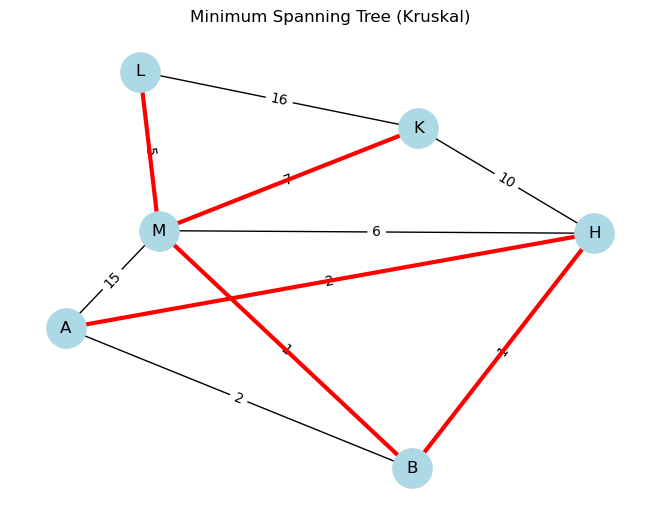

In [21]:
graph = {
    'A': [('H', 2), ('B', 2), ('M', 15)],
    'B': [('H', 1), ('A', 2), ('M', 1)],
    'H': [('A', 2), ('B', 1), ('M', 6), ('K', 10)],
    'M': [('A', 15), ('B', 1), ('H', 6), ('L', 5), ('K', 7)],
    'L': [('M', 5), ('K', 16)],
    'K': [('L', 16), ('M', 7), ('H', 10)],
}

mst, total_weight = kruskal(graph)
print("Minimum Spanning Tree:", mst)
print("Total Weight:", total_weight)

visualize_mst(graph, mst)